# Importing libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

# Loading dataset

In [2]:
with open("train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
print("Shape of X_train data : ", X_train.shape)
print("Shape of y_train data : ", y_train.shape)

print("Shape of X_validation data : ", X_validation.shape)
print("Shape of y_validation data : ", y_validation.shape)

print("Shape of X_test data : ", X_test.shape)
print("Shape of y_test data : ", y_test.shape)

Shape of X_train data :  (34799, 32, 32, 3)
Shape of y_train data :  (34799,)
Shape of X_validation data :  (4410, 32, 32, 3)
Shape of y_validation data :  (4410,)
Shape of X_test data :  (12630, 32, 32, 3)
Shape of y_test data :  (12630,)


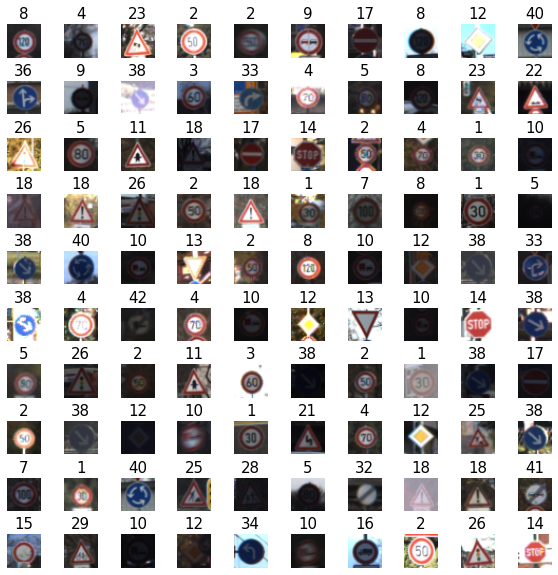

In [5]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.7)


# Shuffle the data

In [6]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# Convert images to grayscale

In [7]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [8]:
print("Shape of X_train_gray data : ", X_train_gray.shape)
print("Shape of X_validation_gray data : ", X_validation_gray.shape)
print("Shape of X_test_gray data : ", X_test_gray.shape)

Shape of X_train_gray data :  (34799, 32, 32, 1)
Shape of X_validation_gray data :  (4410, 32, 32, 1)
Shape of X_test_gray data :  (12630, 32, 32, 1)


# Normalize images

In [9]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

# CNN

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras import datasets

# Initialize CNN
model = Sequential()

# Convolution layer 1
model.add(Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
model.add(AveragePooling2D())

# Dropout
model.add(Dropout(0.2))

# Convolution layer 2
model.add(Conv2D(16, (5,5), activation = 'relu'))
model.add(AveragePooling2D())

# Flattening
model.add(Flatten())

# Dense Layers(Full connection)
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# Output layer 
model.add(Dense(43, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

# Training CNN

In [11]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
ep = 100

history = model.fit(X_train_gray_norm,
                    y_train, 
                    batch_size = 512,
                    epochs = ep,
                    verbose = 2,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/100
68/68 - 0s - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.5030 - val_accuracy: 0.9177
Epoch 2/100
68/68 - 0s - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.4564 - val_accuracy: 0.9254
Epoch 3/100
68/68 - 0s - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.5225 - val_accuracy: 0.9240
Epoch 4/100
68/68 - 0s - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.4901 - val_accuracy: 0.9175
Epoch 5/100
68/68 - 0s - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.4464 - val_accuracy: 0.9317
Epoch 6/100
68/68 - 0s - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.5039 - val_accuracy: 0.9272
Epoch 7/100
68/68 - 0s - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.4845 - val_accuracy: 0.9236
Epoch 8/100
68/68 - 0s - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.4267 - val_accuracy: 0.9279
Epoch 9/100
68/68 - 0s - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.4565 - val_accuracy: 0.9277
Epoch 10/100
68/68 - 0s - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.3795 - val_accuracy: 0.9336
Epoch 11/

68/68 - 0s - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.6093 - val_accuracy: 0.9172
Epoch 84/100
68/68 - 0s - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.5973 - val_accuracy: 0.9161
Epoch 85/100
68/68 - 0s - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.5075 - val_accuracy: 0.9215
Epoch 86/100
68/68 - 0s - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.5866 - val_accuracy: 0.9286
Epoch 87/100
68/68 - 0s - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.5990 - val_accuracy: 0.9270
Epoch 88/100
68/68 - 0s - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.5374 - val_accuracy: 0.9259
Epoch 89/100
68/68 - 0s - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.5281 - val_accuracy: 0.9293
Epoch 90/100
68/68 - 0s - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.4542 - val_accuracy: 0.9336
Epoch 91/100
68/68 - 0s - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.5509 - val_accuracy: 0.9270
Epoch 92/100
68/68 - 0s - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.4730 - val_accuracy: 0.9340
Epoch 93/100


# Performance of CNN

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

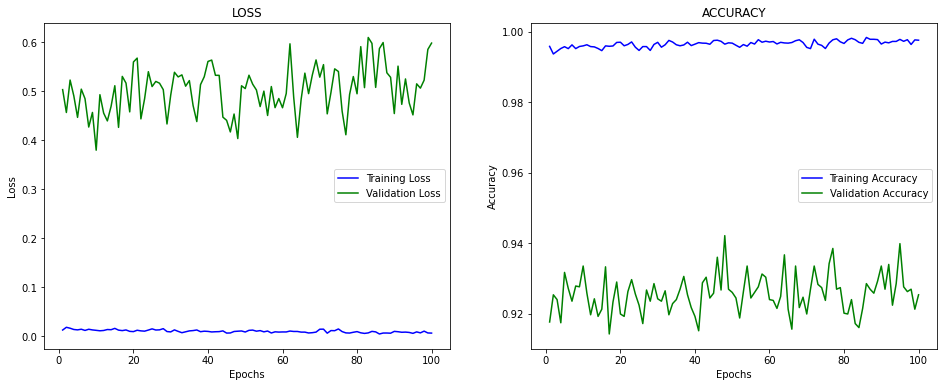

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(range(1,ep+1), history.history['loss'], c = 'b', label = 'Training Loss')
plt.plot(range(1,ep+1), history.history['val_loss'], c = 'g', label = 'Validation Loss')
plt.legend()
plt.title("LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(range(1,ep+1), history.history['accuracy'], c = 'b', label = 'Training Accuracy')
plt.plot(range(1,ep+1), history.history['val_accuracy'], c = 'g', label = 'Validation Accuracy')
plt.legend()
plt.title("ACCURACY")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

In [19]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy : ',score[1])

395/395 [==============================] - 1s 1ms/step - loss: 0.7153 - accuracy: 0.9222
Test Accuracy :  0.9221694469451904


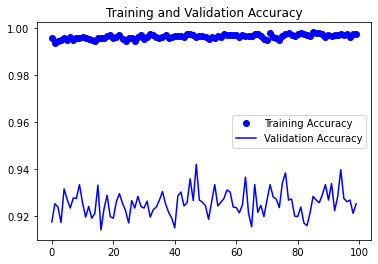

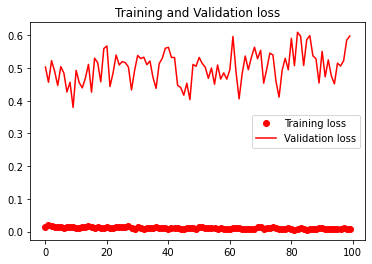

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


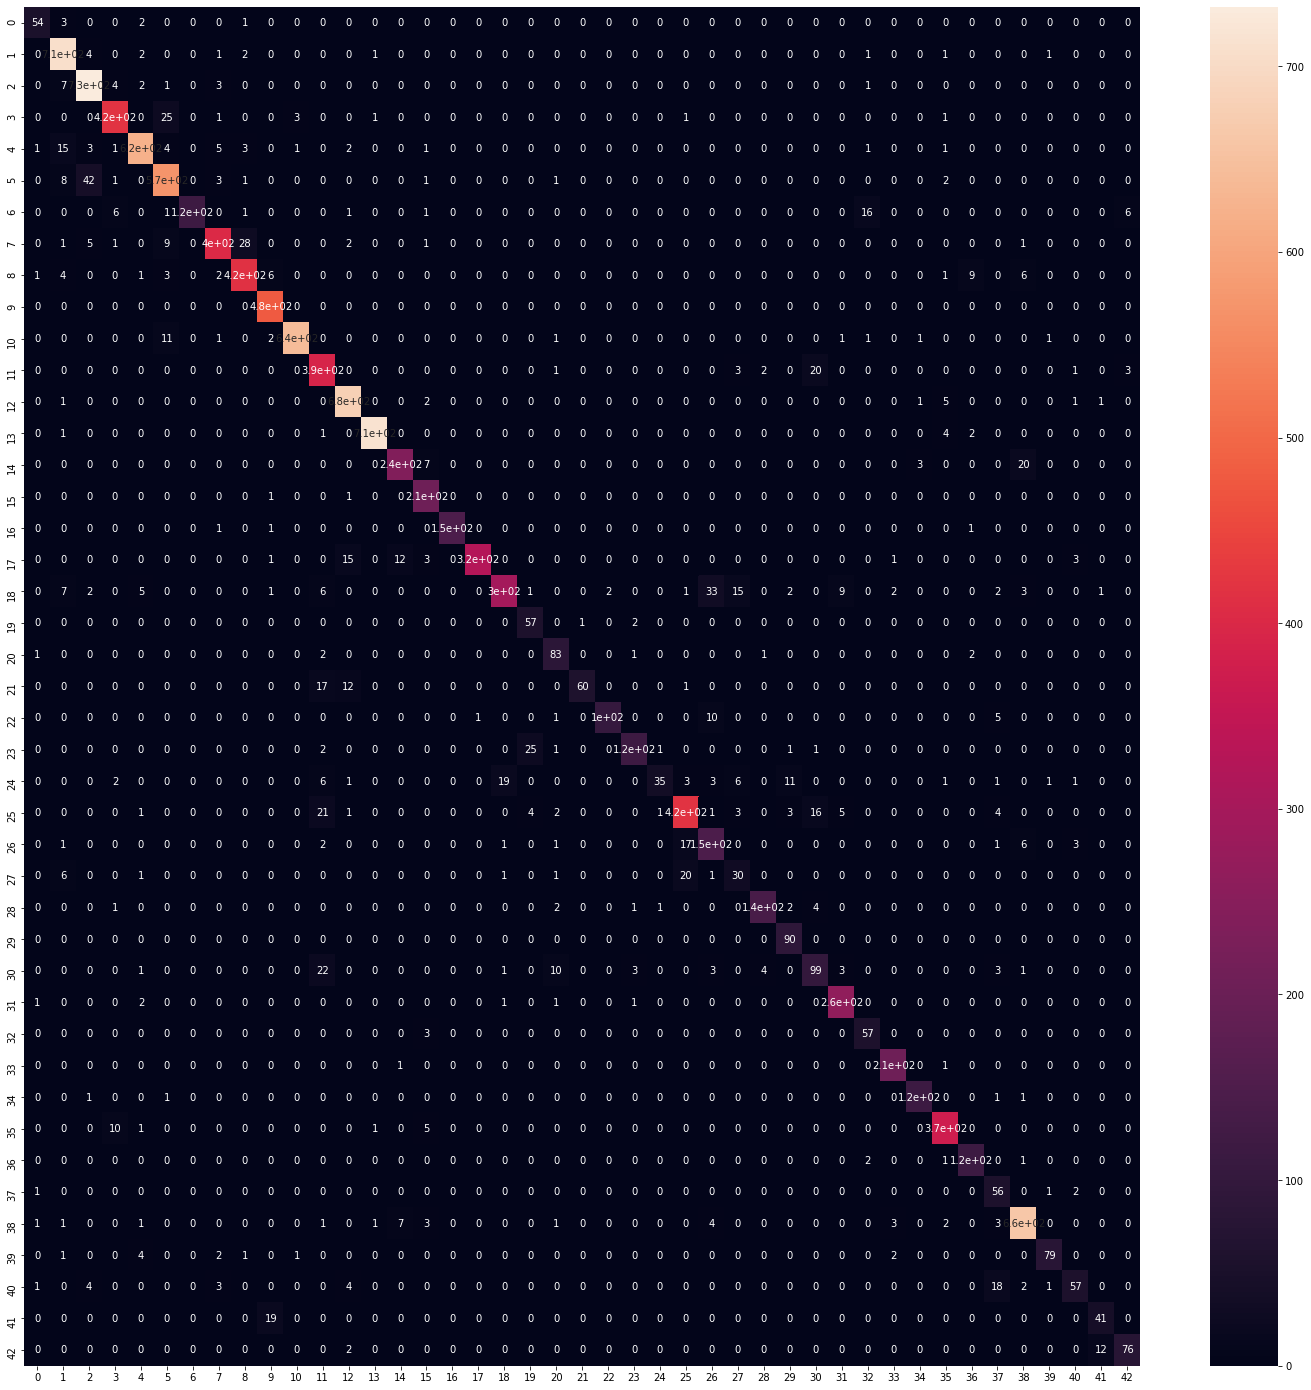

In [21]:
y_pred = model.predict_classes(X_test_gray_norm)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)